In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump
import pickle
from sklearn.model_selection import GridSearchCV

In [39]:
df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes")

In [40]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [41]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## visualizacion del arbol

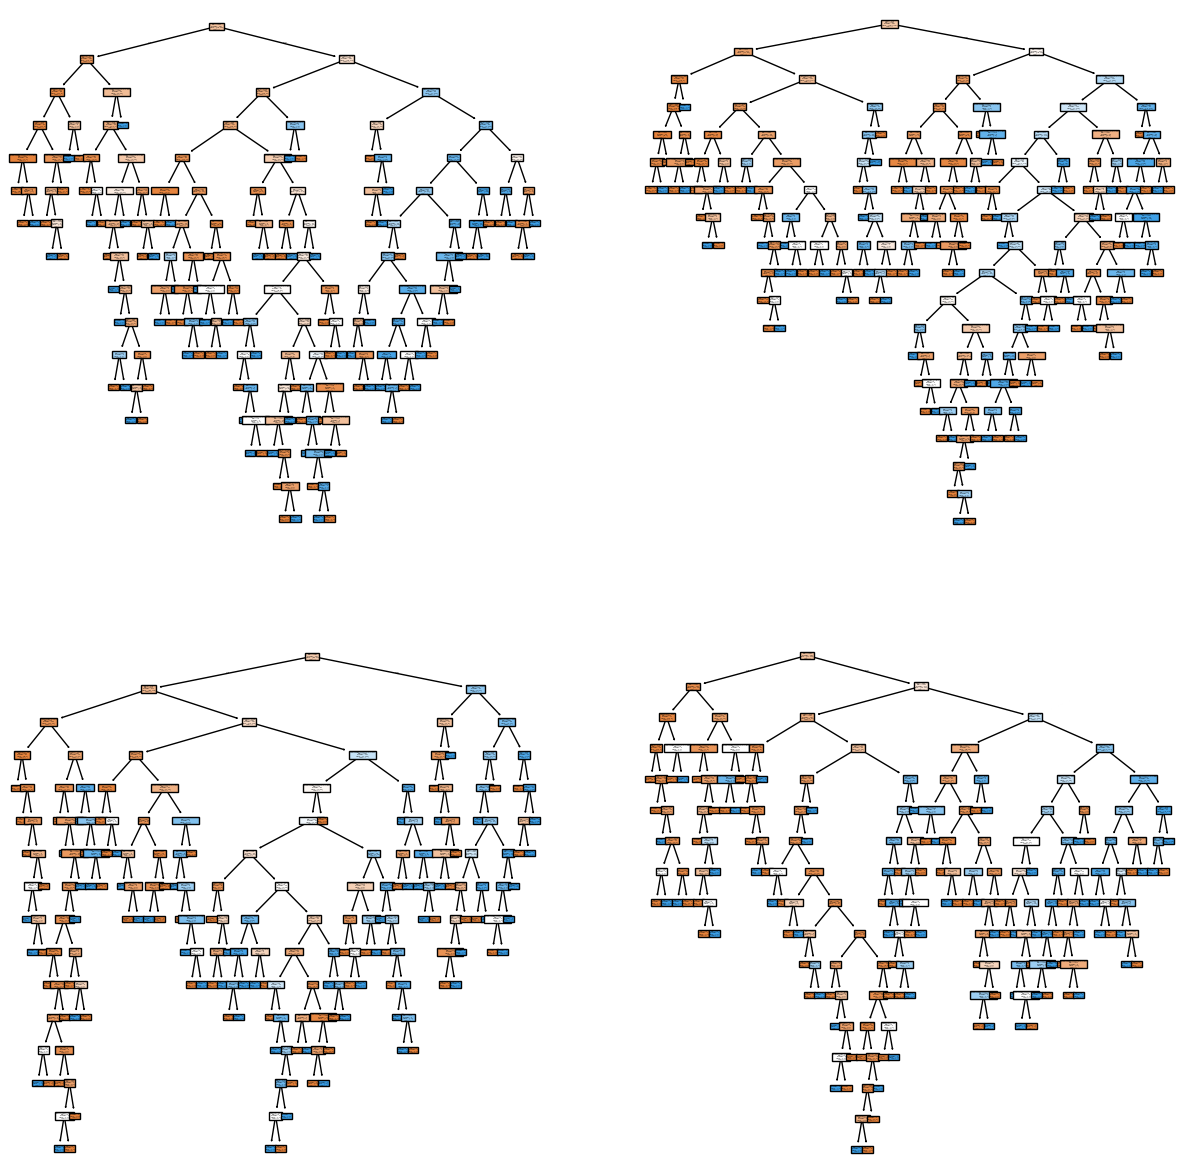

In [42]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

# prediccion del modelo

In [43]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [44]:

accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.8246753246753247, 1.0)

se observa un sobre ajuste de los valores de entrenamiento,  existiendo una diferencia muy alta entre el porcentaje de prediccion con el porcentaje de entrenamiento por tal motivo se procede a hacer una mejora de los parametros del modelo

In [45]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'n_estimators': [ 60, 70,80],
               'max_depth': [4, 5, 6,7],
                'min_samples_split': [2, 5,8 , 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(RandomForestClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 70}

In [46]:
model_clasificacion_diabetes = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators= 70, random_state = 42)
model_clasificacion_diabetes.fit(X_train, y_train)
y_pred_test = model_clasificacion_diabetes.predict(X_test)
y_pred_train = model_clasificacion_diabetes.predict(X_train)
accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7727272727272727, 0.867862969004894)

sigue siendo el porcentaje muy alto entre las diferencias de ambos, hiperparametrizamos nuevamente

In [47]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'n_estimators': [20, 50, 60, 70] ,
               'max_depth': [5,6,7],
                'min_samples_split': [10,11,12],
                'min_samples_leaf': [1, 2]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(RandomForestClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 20}

In [48]:
model_RF = RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=11, n_estimators= 20, random_state = 42)
model_RF.fit(X_train, y_train)
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)
accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.8246753246753247, 0.8743882544861338)

aqui obtenemos resultados mejores con un train de 87% y un test de 82 existiendo una diferencia entre ellos de 5% y obteniendo predicciones con aciertos mayores al  80% tomando este como nuestro mejor modelo 

In [49]:
with open("/workspaces/betaniammc-machine-learning/models/diabetes_ramdon_forest_model.pkl", "wb") as file:
    pickle.dump(model_RF, file)